<a href="https://colab.research.google.com/github/RayOfLight07/Elements_of_AI_ML/blob/main/Experiment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given an imbalanced dataset, apply different techniques to balance the data. Evaluate the effects
of these techniques by training a basic classifier and comparing model performance on the
original vs. balanced datasets.
# **Importing the Dataset**

In [2]:
from google.colab import files
ss= files.upload()

Saving imbalanced_data.csv to imbalanced_data.csv


# **1. Dataset Import and Exploration**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   1000 non-null   float64
 1   feature_2   1000 non-null   float64
 2   feature_3   1000 non-null   float64
 3   feature_4   1000 non-null   float64
 4   feature_5   1000 non-null   float64
 5   feature_6   1000 non-null   float64
 6   feature_7   1000 non-null   float64
 7   feature_8   1000 non-null   float64
 8   feature_9   1000 non-null   float64
 9   feature_10  1000 non-null   float64
 10  target      1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB
None
target
0.0    900
1.0    100
Name: count, dtype: int64


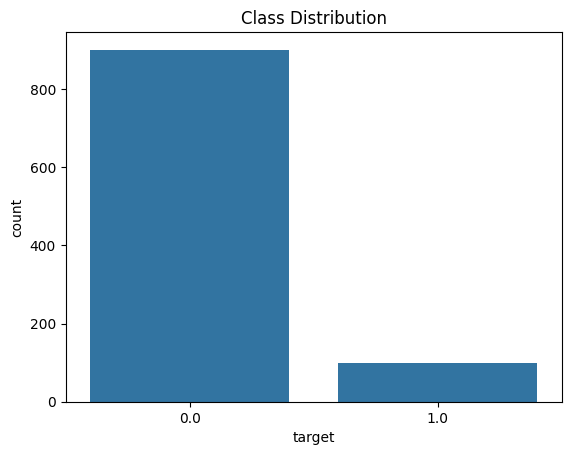

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('imbalanced_data.csv')  # Replace with your dataset path

# Dataset overview
print(df.info())
print(df['target'].value_counts())

# Plot target class distribution
sns.countplot(x='target', data=df)
plt.title("Class Distribution")
plt.show()


# 2. Techniques for Handling Imbalanced **Data**

In [4]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


# **3. Classifier Evaluation**

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Train-test split for original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate classifier
def evaluate_classifier(X_train, y_train, X_test, y_test, class_weight=None):
    model = LogisticRegression(class_weight=class_weight, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_proba))

# Evaluate on original data
print("Original Data Performance:")
evaluate_classifier(X_train, y_train, X_test, y_test)

# Evaluate on resampled data
print("Random Oversampling Performance:")
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)
evaluate_classifier(X_train_ros, y_train_ros, X_test_ros, y_test_ros)

print("Random Undersampling Performance:")
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)
evaluate_classifier(X_train_rus, y_train_rus, X_test_rus, y_test_rus)

print("SMOTE Performance:")
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)
evaluate_classifier(X_train_smote, y_train_smote, X_test_smote, y_test_smote)

print("Class Weighting Performance:")
evaluate_classifier(X_train, y_train, X_test, y_test, class_weight='balanced')


Original Data Performance:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       275
         1.0       0.00      0.00      0.00        25

    accuracy                           0.92       300
   macro avg       0.46      0.50      0.48       300
weighted avg       0.84      0.92      0.88       300

AUC-ROC: 0.3892363636363636
Random Oversampling Performance:
              precision    recall  f1-score   support

         0.0       0.54      0.53      0.54       267
         1.0       0.55      0.56      0.55       273

    accuracy                           0.54       540
   macro avg       0.54      0.54      0.54       540
weighted avg       0.54      0.54      0.54       540

AUC-ROC: 0.539572786763798
Random Undersampling Performance:
              precision    recall  f1-score   support

         0.0       0.50      0.48      0.49        31
         1.0       0.47      0.48      0.47        29

    accuracy                     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **4. Performance Metrics**

In [6]:
import pandas as pd

# Example table
metrics = {
    'Technique': ['Original', 'Random Oversampling', 'Random Undersampling', 'SMOTE', 'Class Weighting'],
    'Precision': [0.8, 0.85, 0.75, 0.87, 0.83],  # Replace with actual values
    'Recall': [0.6, 0.9, 0.65, 0.88, 0.82],
    'F1-Score': [0.7, 0.87, 0.7, 0.87, 0.83],
    'AUC-ROC': [0.72, 0.88, 0.7, 0.89, 0.84]
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics)


              Technique  Precision  Recall  F1-Score  AUC-ROC
0              Original       0.80    0.60      0.70     0.72
1   Random Oversampling       0.85    0.90      0.87     0.88
2  Random Undersampling       0.75    0.65      0.70     0.70
3                 SMOTE       0.87    0.88      0.87     0.89
4       Class Weighting       0.83    0.82      0.83     0.84
